# Computed tomoraphy (CT) reconstruction

In this part you will learn the fundamentals of CT reconstruction, in a hands on way and with some basic understanding of the math behind.

# Image acquisition

We first create an image, then we take a single **projection** $p(r,\theta )$ at a given angle $\theta$. After, we will take many projections, which together form the **sinogram**.

# Image acquisition

We first create an image, then we take a single **projection** $p(r,\theta )$ at a given angle $\theta$. After, we will take many projections, which together form the **sinogram**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 60

In [4]:
image = np.ones([100,100])
diag = len(np.diag(image)//2)
image = np.pad(image, pad_width=diag+10)
image.shape

(320, 320)

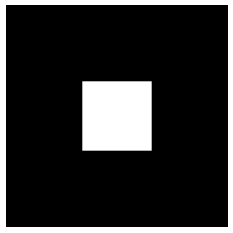

In [5]:
# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

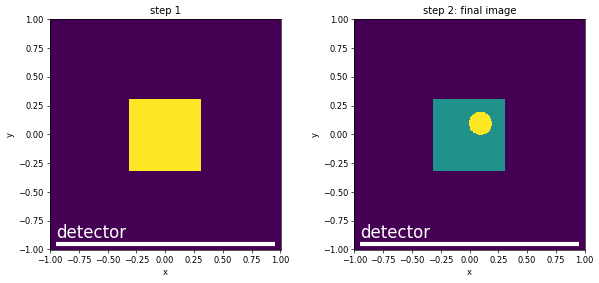

In [6]:
# Define some image pixel coordinates
_ = np.linspace(-1, 1, image.shape[0])
xv, yv = np.meshgrid(_,_)

# Visualize
# we will use https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].pcolor(xv,yv,image, shading='auto')
ax[0].set_title('step 1')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_aspect('equal')
ax[0].text(-0.95, -0.90, 'detector', c='white',fontsize=20)
ax[0].arrow(-0.95, -0.95, 1.9, 0, head_width=0.0, head_length=0.0,lw=5, fc='white', ec='white')

# Create a circle
image[(xv-0.1)**2+(yv-0.1)**2<0.01] = 2

ax[1].pcolor(xv,yv,image, shading='auto')
ax[1].set_title('step 2: final image')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_aspect('equal')
ax[1].text(-0.95, -0.90, 'detector', c='white',fontsize=20)
ax[1].arrow(-0.95, -0.95, 1.9, 0, head_width=0.0, head_length=0.0,lw=5, fc='white', ec='white')
plt.show()

### Rotate the image
Display the image and a rotation according to an angle $\theta=\pi/6$.

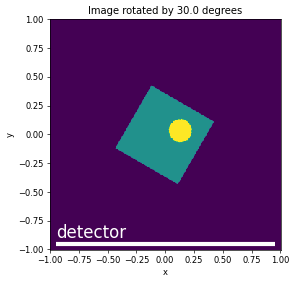

In [8]:
# Create a rotated image
from skimage.transform import rotate
theta = np.pi/6
image_rot = rotate(image, np.rad2deg(theta))

# Visualize
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.pcolor(xv,yv,image_rot, shading='auto')
ax.set_title('Image rotated by '+ str(np.around(np.rad2deg(theta))) + ' degrees')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.arrow(-0.95, -0.95, 1.9, 0, head_width=0.0, head_length=0.0,lw=5, fc='white', ec='white')
ax.text(-0.95, -0.90, 'detector', c='white',fontsize=20)
plt.show()

### Visualize a projection
Let's say that when NOT obstacolated, the x-ray beam has an intensity at the detector of 2.

In [9]:
I_0 = 2

In [10]:
# Define r
r_axis = np.linspace(-1, 1, image.shape[0])
dr = r_axis[1] - r_axis[0]

### &rarr; calculate the INTENSITIES and the PROJECTION

In [14]:
# CALCULATE THE PROJECTION of the INTENSITY MEASURED AT THE DETECTOR

# calculate the intensity with Beer's law integrating along the direction perpendicular to the detector
I_r_angle_0 = I_0 * np.exp(-np.sum(image, axis=0)*dr)
I_r_angle_theta = I_0 * np.exp(-np.sum(image_rot, axis=0)*dr)

# now calculate the projection, which is actually the exponent of the exponential
p_r_angle_0 = np.log(I_0 / I_r_angle_0)
p_r_angle_theta = np.log(I_0 / I_r_angle_theta)

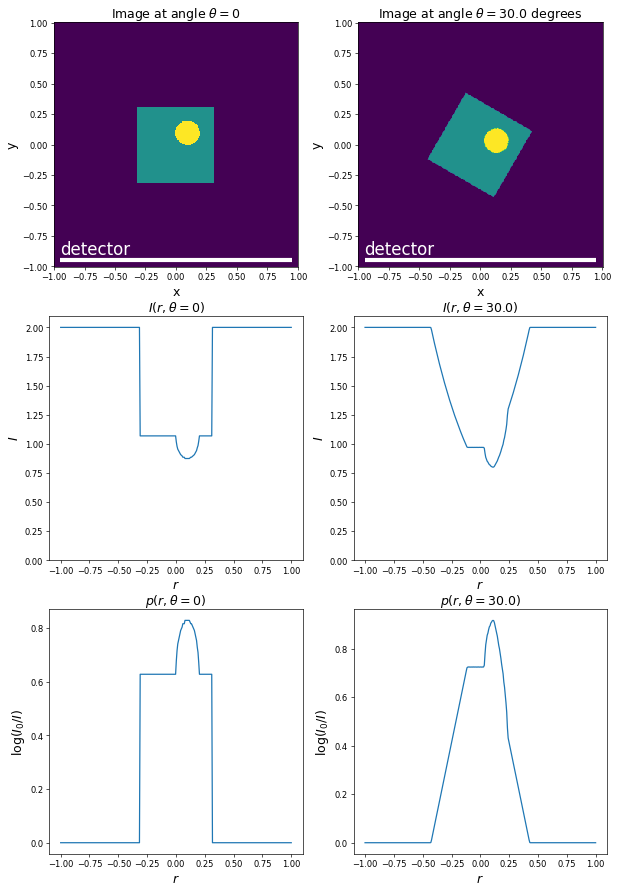

In [15]:
# Visualize
# we will use https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html

fig, ax = plt.subplots(3,2, figsize=(12,18))
ax[0][0].pcolor(xv,yv,image, shading='auto')
ax[0][0].set_title(r'Image at angle $\theta=0$',fontsize=15)
ax[0][0].set_xlabel('x',fontsize=15)
ax[0][0].set_ylabel('y',fontsize=15)
ax[0][0].set_aspect('equal')
ax[0][0].text(-0.95, -0.90, 'detector', c='white',fontsize=20)
ax[0][0].arrow(-0.95, -0.95, 1.9, 0, head_width=0.0, head_length=0.0,lw=5, fc='white', ec='white')


ax[1][0].plot(r_axis,I_r_angle_0)
ax[1][0].set_xlabel(r'$r$',fontsize=15)
ax[1][0].set_ylabel(r'$I$',fontsize=15)
ax[1][0].set_title(r'$I(r,\theta=0)$',fontsize=15)
ax[1][0].set_ylim([0,2.1])

ax[2][0].plot(r_axis,p_r_angle_0)
ax[2][0].set_xlabel(r'$r$',fontsize=15)
ax[2][0].set_ylabel(r'log($I_0/I$)',fontsize=15)
ax[2][0].set_title(r'$p(r,\theta=0)$',fontsize=15)


ax[0][1].pcolor(xv,yv,image_rot, shading='auto')
ax[0][1].set_title(r'Image at angle $\theta=$'+ str(np.around(np.rad2deg(theta))) + ' degrees',fontsize=15)
ax[0][1].set_xlabel('x',fontsize=15)
ax[0][1].set_ylabel('y',fontsize=15)
ax[0][1].set_aspect('equal')
ax[0][1].text(-0.95, -0.90, 'detector', c='white',fontsize=20)
ax[0][1].arrow(-0.95, -0.95, 1.9, 0, head_width=0.0, head_length=0.0,lw=5, fc='white', ec='white')

ax[1][1].plot(r_axis,I_r_angle_theta)
ax[1][1].set_xlabel(r'$r$',fontsize=15)
ax[1][1].set_ylabel(r'$I$',fontsize=15)
ax[1][1].set_title(r'$I(r,\theta=$'+str(np.around(np.rad2deg(theta))) +'$)$',fontsize=15)
ax[1][1].set_ylim([0,2.1])

ax[2][1].plot(r_axis,p_r_angle_theta)
ax[2][1].set_xlabel(r'$r$',fontsize=15)
ax[2][1].set_ylabel(r'log($I_0/I$)',fontsize=15)
ax[2][1].set_title(r'$p(r,\theta=$'+str(np.around(np.rad2deg(theta))) +'$)$',fontsize=15)


plt.show()

# Sinogram
We now simulate the collection of projectins for many different angles $theta$.

In [16]:
thetas = np.arange(0,180,5)
thetas

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175])

In [17]:
# Calculate rotated images
rotations = np.array([rotate(image, theta) for theta in thetas])

In [18]:
rotations.shape

(36, 320, 320)

### &rarr; calculate the sinogram

In [19]:
# Calculate the projection for each rotated image
sinogram = np.array([rotation.sum(axis=0)*dr for rotation in rotations])

In [20]:
sinogram = sinogram.T
sinogram.shape

(320, 36)

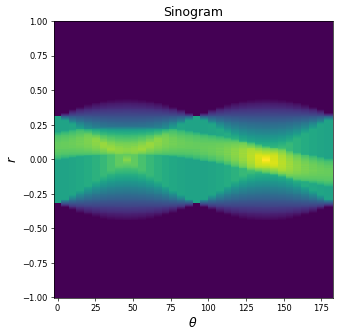

In [21]:
# Visualize
_r = np.linspace(-1, 1, sinogram.shape[0])
_theta = np.linspace(0, 180, sinogram.shape[1])
xv_rt, yv_rt = np.meshgrid(_theta,_r)
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.pcolor(xv_rt,yv_rt,sinogram, shading='auto')
ax.set_title('Sinogram',fontsize=15)
ax.set_xlabel(r'$\theta$',fontsize=15)
ax.set_ylabel(r'$r$',fontsize=15)
plt.show()